<a href="https://colab.research.google.com/github/MSaber9/ML/blob/master/BayesianOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sequential Model Based Optimisation - SMBO Optimizer

Implement the SMBO optimizer:
-	Use the Gaussian processes and Random Forest as a surrogate function. Use random search as baseline method.
-	Compare these three methods with each other. 
- Build a graph of the minimum found value versus the number of calls of the optimized function.
-	Use the Rastrigin Function as a test function.


## Library 

In [2]:
pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.0.1-cp36-none-any.whl size=10032 sha256=11e5d134cd4ad0a89ec788b8025d5759da156942d3bb827cff7dfc47c9680492
  Stored in directory: /root/.cache/pip/wheels/1d/0d/3b/6b9d4477a34b3905f246ff4e7acf6aafd4cc9b77d473629b77
Successfully built bayesian-optimization


In [0]:
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from bayes_opt import BayesianOptimization
from scipy.stats import norm
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 

## Rastrigin Function

In [0]:
X = np.linspace(-10, 10, 100)     
Y = np.linspace(-10, 10, 100)     
X, Y = np.meshgrid(X, Y) 

Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20

## Random Search

In [0]:
BasicA = np.arange(-10,10,0.01)
BasicZ = np.arange(0,1000,0.1)
epochs = 100

In [0]:
def ValueZ(BasicA):
    X = np.random.choice(BasicA,1)
    Y = np.random.choice(BasicA,1)
    Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20
    return Z

In [0]:
def RandomSearch (n_times):
    RsList = [] 
    for i in range(n_times):
        valueList = []
        min_Z = np.random.choice(BasicZ,1)
        for i in range(epochs):
            Z = ValueZ (BasicA)
            valueList.append(Z)
            if min_Z > Z:
                min_Z = Z
            else:
                pass
        RsList.append(valueList)
    return RsList


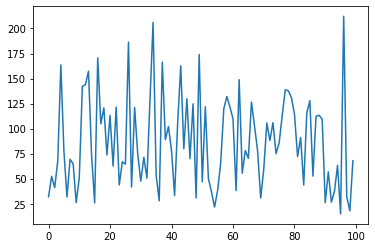

In [51]:
RandomSearch = RandomSearch(10)
axis_X = range(epochs)
plt.figure()
plt.plot(axis_X,RandomSearch [0])
plt.show()

## Guassian Processing

In [0]:
def initialization(BasicA,n_samples):
    X_initial = []
    Y_initial = []
    for i in range(n_samples):
        X = np.random.choice(BasicA,1)
        Y = np.random.choice(BasicA,1)
        X_initial.append([X[0],Y[0]])
        Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 25
        Y_initial.append(Z)
    X_initial = np.array(X_initial)
    Y_initial = np.array(Y_initial)
    return X_initial,Y_initial

In [0]:
def GPEquation (X,X_sample, Y_sample,gp,tradeoff=0.1):
    mu, sigma = gp.predict(X, return_std=True)
    sigma = sigma + 1e-6

    mu_sample_opt = np.max(Y_sample)

    imp = mu - mu_sample_opt - tradeoff
    Z = imp / sigma
    ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
    return ei

In [0]:
def FindZ(x_new):
    Z = (x_new[0]**2 - 10 * np.cos(2 * np.pi * x_new[0])) + (x_new[1]**2 - 10 * np.cos(2 * np.pi * x_new[1])) + 20
    return Z


In [0]:
def GuassianProc (n):
    all_result = []
    for i in range(n):
        bounds = np.asarray([[-10,  10], [-10,  10]])
        GuassianProc = []
        gp = GaussianProcessRegressor(kernel=Matern(nu=2.5), n_restarts_optimizer=9)
        X_initial,Y_initial = initialization(BasicA,5)
        min_Z = Y_initial[Y_initial.argmin()]

        gp.fit(X_initial,Y_initial)
        def min_obj(X):
            return -GPEquation (X.reshape(-1, 2),X_initial,Y_initial,gp)

        min_val = None
        min_x = None
        x_set =  np.random.uniform(bounds[:, 0], bounds[:, 1], size=(100, 2))
        for x0 in x_set: 
            res = minimize(min_obj, x0=x0, bounds=bounds, method='L-BFGS-B')
            if  min_val is None or res.fun < min_val:

                min_val = res.fun
                min_x = res.x

        for i in range(epochs):
            new_Z = FindZ(min_x)
            GuassianProc.append(new_Z)

            if new_Z < min_Z:
                min_Z = new_Z

            X_initial = np.vstack((X_initial,min_x))
            Y_initial = np.vstack((Y_initial,new_Z))
            gp.fit(X_initial,Y_initial)
            min_val = None
            min_x = None
            x_set =  np.random.uniform(bounds[:, 0], bounds[:, 1], size=(100, 2))
            for x0 in x_set: 
                res = minimize(min_obj, x0=x0, bounds=bounds, method='L-BFGS-B')
                if  min_val is None or res.fun < min_val:

                    min_val = res.fun
                    min_x = res.x
        all_result.append(GuassianProc)
    return all_result

/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

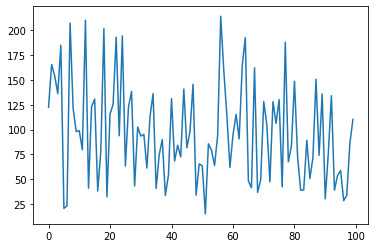

In [56]:
GuassianProc = GuassianProc (10)

axis_X = range(epochs)
plt.figure()
plt.plot(axis_X, GuassianProc[0])
plt.show()

## Random Forest

In [0]:
def RFEquation (X,X_sample, Y_sample,rf,tradeoff=0.1):
    predicts = rf.predict(X)
    mu, sigma = predicts.mean(), predicts.std()
    sigma = sigma + 1e-6

    mu_sample_opt = np.max(Y_sample)

    imp = mu - mu_sample_opt - tradeoff
    Z = imp / sigma
    ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
    return ei

In [0]:
def RandomForest(n):
    RFList = []
    for i in range(n):
        bounds = np.asarray([[-10,  10], [-10,  10]])
        RFValue = []
        rf = RandomForestRegressor(n_estimators=25)
        X_initial,Y_initial = initialization(BasicA,5)
        min_Z = Y_initial[Y_initial.argmin()]

        rf.fit(X_initial,Y_initial)
        def min_obj(X):
            return -RFEquation (X.reshape(-1, 2),X_initial,Y_initial,rf)

        min_val = None
        min_x = None
        x_set =  np.random.uniform(bounds[:, 0], bounds[:, 1], size=(100, 2))
        for x0 in x_set: 
            res = minimize(min_obj, x0=x0, bounds=bounds, method='L-BFGS-B')
            if  min_val is None or res.fun < min_val:

                min_val = res.fun
                min_x = res.x

        for i in range(epochs):
            new_Z = FindZ(min_x)
            RFValue.append(new_Z)

            if new_Z < min_Z:
                min_Z = new_Z

            X_initial = np.vstack((X_initial,min_x))
            Y_initial = np.vstack((Y_initial,new_Z))
            rf.fit(X_initial,Y_initial)
            min_val = None
            min_x = None
            x_set =  np.random.uniform(bounds[:, 0], bounds[:, 1], size=(100, 2))
            for x0 in x_set: 
                res = minimize(min_obj, x0=x0, bounds=bounds, method='L-BFGS-B')
                if  min_val is None or res.fun < min_val:

                    min_val = res.fun
                    min_x = res.x
        RFList.append(RFValue)
    return RFList

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: D

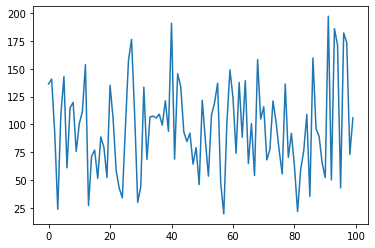

In [61]:
RandomForest= RandomForest(10)

axis_X = range(epochs)
plt.figure()
plt.plot(axis_X,RandomForest[0])
plt.show()

## Plot Minimum Models

In [0]:
def MinList(result):
    min_list = []
    min_val = result[0]
    #step = 0
    for i in range(epochs):
        val = result[i]
        if val < min_val:
            min_list.append(val)
            min_val = val
        else:
            min_list.append(min_val)
    return np.array(min_list)
    

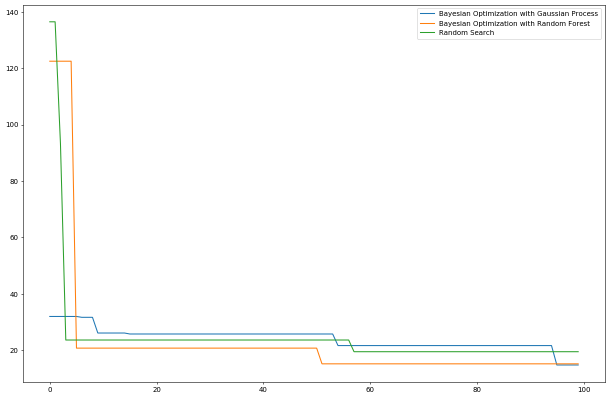

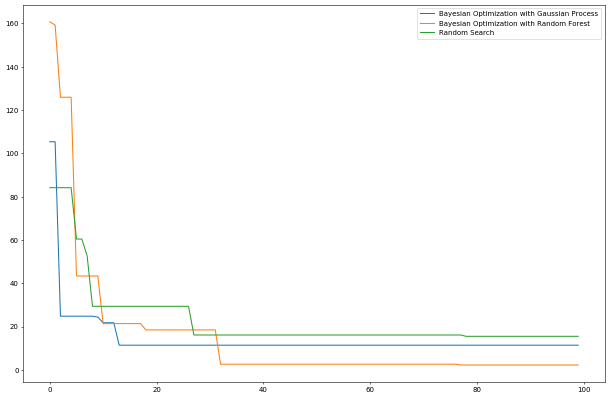

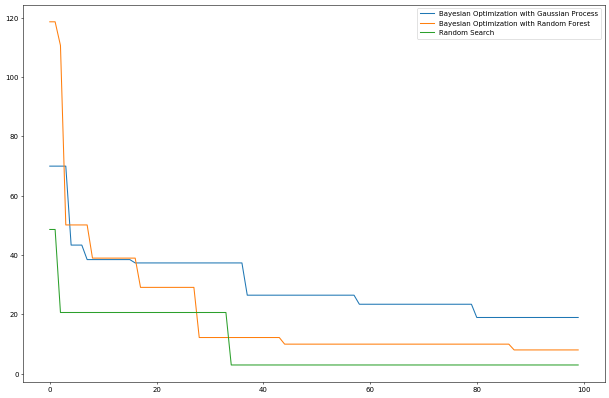

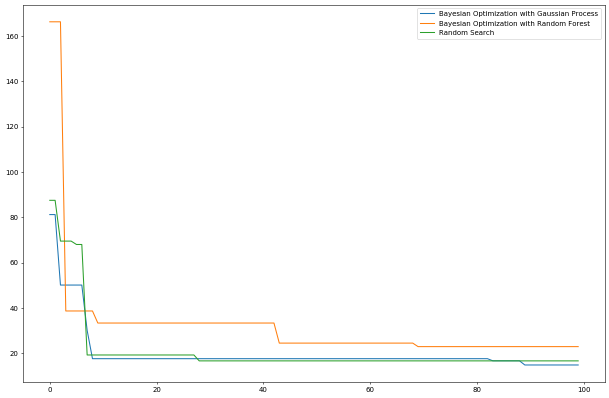

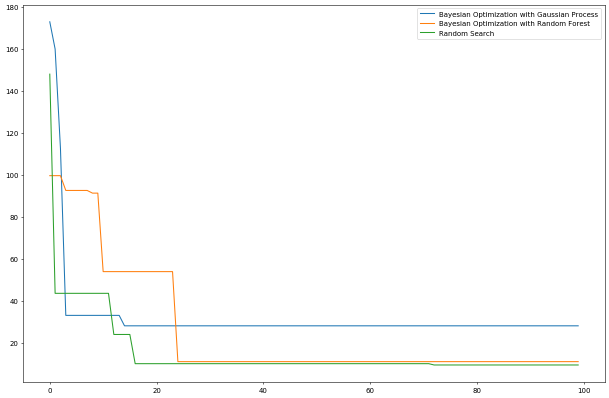

In [63]:
for i in range(5):
    axis_X = range(epochs)
    RsList = MinList (RandomSearch[i])
    GpList = MinList (GuassianProc[i])
    RfList = MinList (RandomForest[i])
    plt.figure(num=None, figsize=(15, 10), dpi=50)
    plt.plot(axis_X,RsList)
    plt.plot(axis_X,GpList)
    plt.plot(axis_X,RfList)
    plt.legend(["Bayesian Optimization with Gaussian Process",  "Bayesian Optimization with Random Forest",  "Random Search"])
    plt.show()

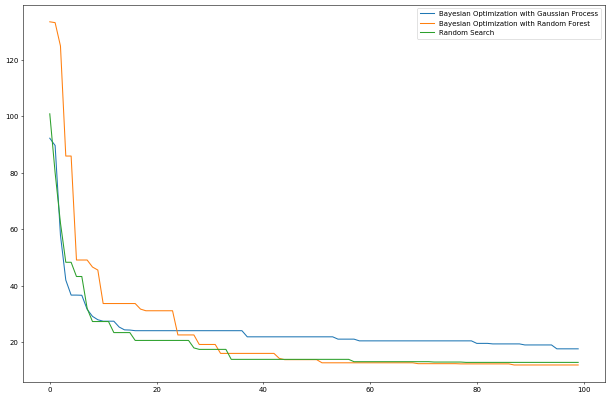

In [65]:
RsList = np.zeros((100,1))
GpList = np.zeros((100,1))
RfList = np.zeros((100,1))
for i in range(5):
    RsList += MinList (RandomSearch[i]).reshape(100,1)
    GpList += MinList (GuassianProc[i]).reshape(100,1)
    RfList += MinList (RandomForest[i]).reshape(100,1)
RsList = RsList/5
GpList = GpList/5
RfList = RfList/5

axis_X = range(epochs)
plt.figure(num=None, figsize=(15, 10), dpi=50)
plt.plot(axis_X,RsList)
plt.plot(axis_X,GpList)
plt.plot(axis_X,RfList)
plt.legend(["Bayesian Optimization with Gaussian Process", "Bayesian Optimization with Random Forest", "Random Search"])
plt.show()